# 🚀 Lesson 4: Outlier Detection Using the IQR Method

---

## 📌 What is the IQR Method?  
The **Interquartile Range (IQR) Method** is a common statistical technique to detect outliers in a dataset. It works by analyzing the spread of data using quartiles:

- **Q1 (25th percentile)**: The first quartile (lower bound of the data).  
- **Q3 (75th percentile)**: The third quartile (upper bound of the data).  
- **IQR (Interquartile Range)**: `IQR = Q3 - Q1`, represents the middle 50% of the data.  
- **Lower Bound**: `Q1 - 1.5 * IQR` (anything below is an outlier).  
- **Upper Bound**: `Q3 + 1.5 * IQR` (anything above is an outlier).  

Any data points **outside** these bounds are considered **outliers** 🚨.

---



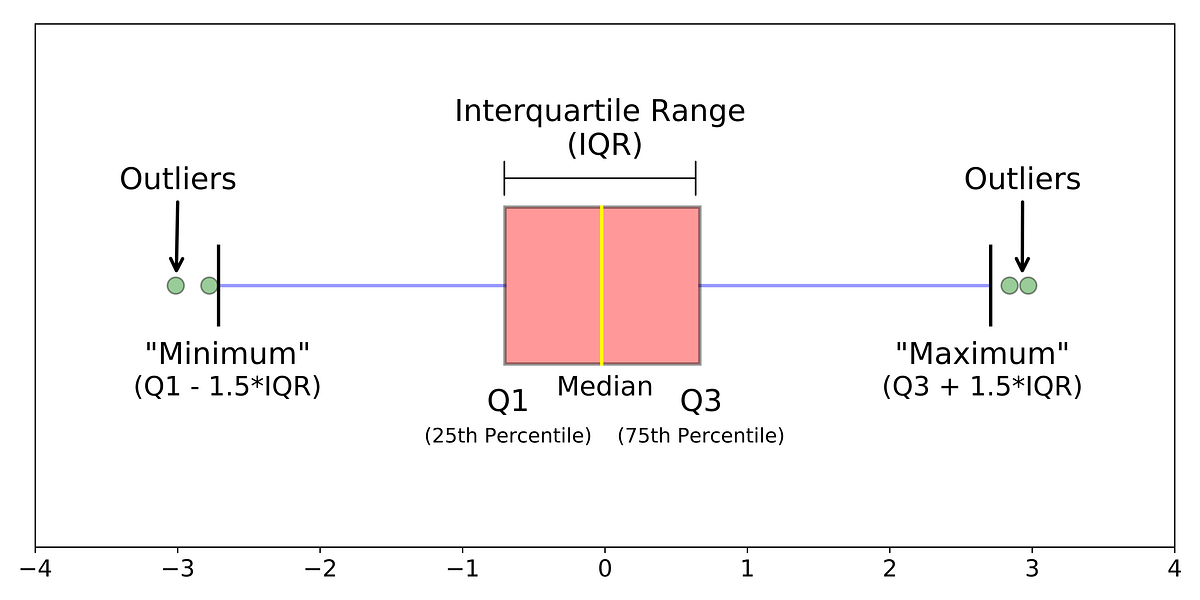

# ✅ IQR (Interquartile Range) method.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore FutureWarnings (e.g., deprecation warnings from Seaborn)
warnings.simplefilter(action='ignore', category=FutureWarning)

# 📌 Load the dataset
df = pd.read_csv('loan_applications.csv')  # Read the dataset from CSV file


def analyze_and_remove_outliers_iqr(df, column):
    """
    Analyze, visualize, and remove outliers from a dataframe column using the IQR (Interquartile Range) method.

    Parameters:
    df (pandas.DataFrame): Input dataframe
    column (str): Name of the column to detect and handle outliers

    Returns:
    pandas.DataFrame: A new dataframe with outliers removed or capped.
    """

    # ✅ Step 1: Create a copy of the dataframe to avoid modifying the original
    df_clean = df.copy()

    # ✅ Step 2: Compute Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # ✅ Step 3: Compute lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # ✅ Step 4: Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # ✅ Step 5: Print summary statistics before removing outliers
    print(f"\n📊 === Analysis for {column} ===")
    print("\n📌 Before outlier removal:")
    print(f"🔹 Count: {df[column].count()}")
    print(f"🔹 Mean: {df[column].mean():.2f}")
    print(f"🔹 Median: {df[column].median():.2f}")
    print(f"🔹 Std Dev: {df[column].std():.2f}")
    print(f"🔹 Min: {df[column].min():.2f}")
    print(f"🔹 Max: {df[column].max():.2f}")

    print(f"\n⚠ Number of outliers detected: {len(outliers)}")
    print(f"📌 Outlier percentage: {(len(outliers)/len(df))*100:.2f}%")

    # ✅ Step 6: Visualizing data before outlier removal
    plt.figure(figsize=(15, 5))

    # 📌 Boxplot before removal
    plt.subplot(131)
    sns.boxplot(y=df[column], color='lightblue')
    plt.title('Before Removal\nBoxplot')

    # 📌 Histogram before removal
    plt.subplot(132)
    sns.histplot(df[column], kde=True, color='blue', alpha=0.6)
    plt.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='r', linestyle='--', label='Upper Bound')
    plt.title('Before Removal\nDistribution')
    plt.legend()

    # ✅ Step 7: Cap the outliers at the bounds
    df_clean.loc[df_clean[column] > upper_bound, column] = upper_bound
    df_clean.loc[df_clean[column] < lower_bound, column] = lower_bound

    # 📌 Histogram after removal
    plt.subplot(133)
    sns.histplot(df_clean[column], kde=True, color='green', alpha=0.6)
    plt.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='r', linestyle='--', label='Upper Bound')
    plt.title('After Removal\nDistribution')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # ✅ Step 8: Print summary statistics after outlier removal
    print("\n✅ After outlier removal:")
    print(f"🔹 Count: {df_clean[column].count()}")
    print(f"🔹 Mean: {df_clean[column].mean():.2f}")
    print(f"🔹 Median: {df_clean[column].median():.2f}")
    print(f"🔹 Std Dev: {df_clean[column].std():.2f}")
    print(f"🔹 Min: {df_clean[column].min():.2f}")
    print(f"🔹 Max: {df_clean[column].max():.2f}")

    return df_clean


🚀 Processing feature: income

📊 === Analysis for income ===

📌 Before outlier removal:
🔹 Count: 47555
🔹 Mean: 41169.45
🔹 Median: 34830.72
🔹 Std Dev: 28443.31
🔹 Min: 977.79
🔹 Max: 429628.49

⚠ Number of outliers detected: 2031
📌 Outlier percentage: 4.06%


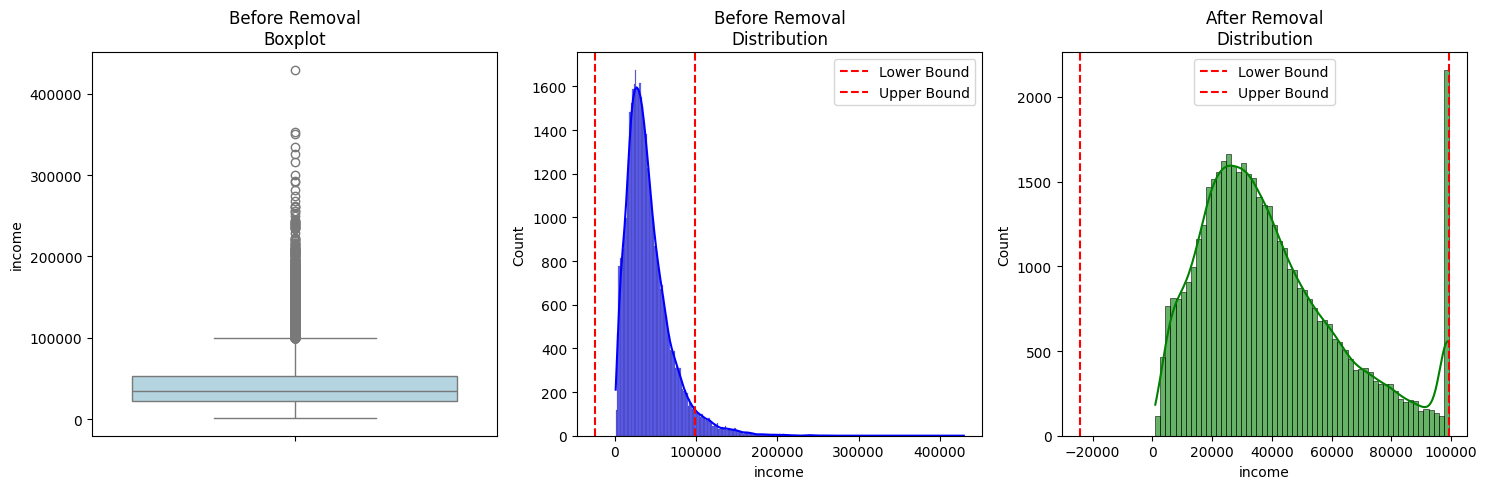


✅ After outlier removal:
🔹 Count: 47555
🔹 Mean: 39888.03
🔹 Median: 34830.72
🔹 Std Dev: 24032.78
🔹 Min: 977.79
🔹 Max: 99188.24

🚀 Processing feature: loan_amount

📊 === Analysis for loan_amount ===

📌 Before outlier removal:
🔹 Count: 50000
🔹 Mean: 113090.86
🔹 Median: 84977.24
🔹 Std Dev: 101910.23
🔹 Min: 821.49
🔹 Max: 1761023.21

⚠ Number of outliers detected: 2418
📌 Outlier percentage: 4.84%


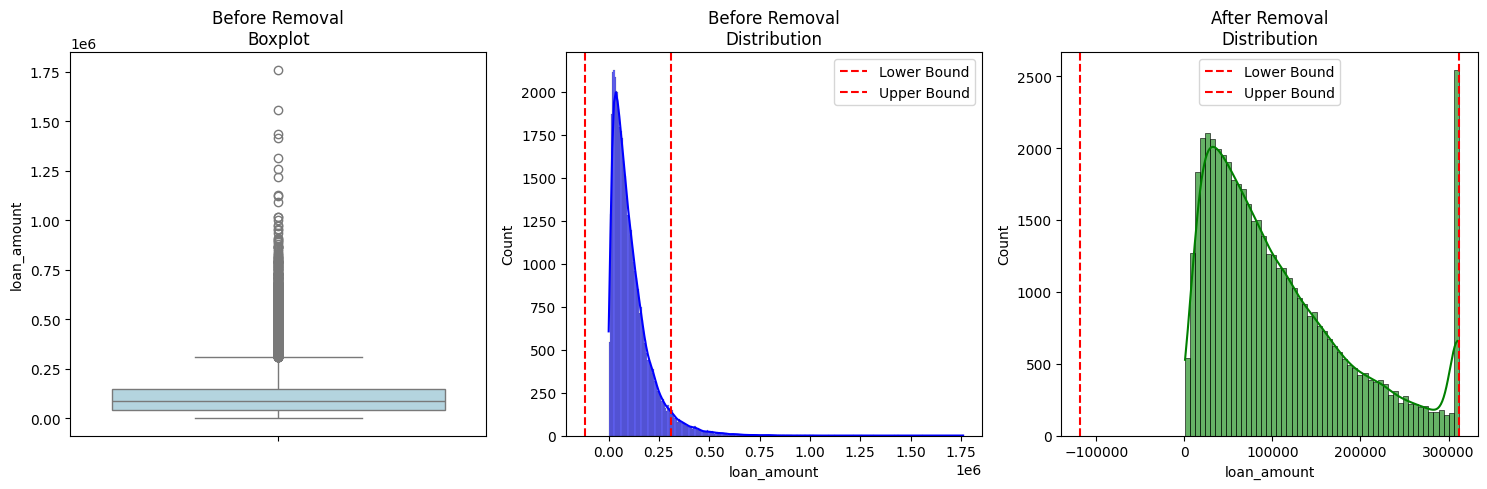


✅ After outlier removal:
🔹 Count: 50000
🔹 Mean: 107604.50
🔹 Median: 84977.24
🔹 Std Dev: 82370.91
🔹 Min: 821.49
🔹 Max: 311619.32

🚀 Processing feature: monthly_payment

📊 === Analysis for monthly_payment ===

📌 Before outlier removal:
🔹 Count: 50000
🔹 Mean: 5070.96
🔹 Median: 3210.84
🔹 Std Dev: 5931.37
🔹 Min: 23.52
🔹 Max: 130203.29

⚠ Number of outliers detected: 3524
📌 Outlier percentage: 7.05%


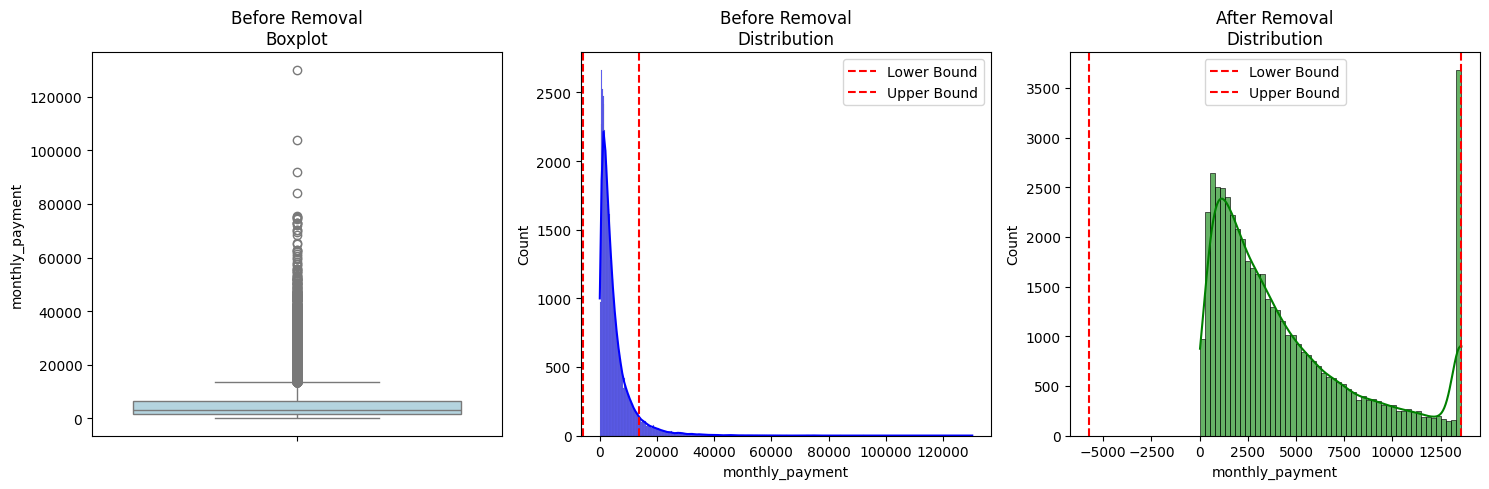


✅ After outlier removal:
🔹 Count: 50000
🔹 Mean: 4511.67
🔹 Median: 3210.84
🔹 Std Dev: 3889.43
🔹 Min: 23.52
🔹 Max: 13581.06

🎯 Outlier detection and handling completed for all selected features!


In [3]:
# ✅ Example usage of the IQR-based outlier removal function

# 📌 Step 1: Define the numerical features we want to check for outliers
numerical_features = ['income', 'loan_amount', 'monthly_payment']

# ✅ Step 2: Create a copy of the original dataframe to preserve raw data
df_cleaned = df.copy()

# 🔁 Step 3: Iterate through each numerical feature and apply the IQR method
for feature in numerical_features:
    print(f"\n🚀 Processing feature: {feature}")

    # 🔍 Apply the outlier detection and removal function to each column
    df_cleaned = analyze_and_remove_outliers_iqr(df_cleaned, feature)

# ✅ After the loop, `df_cleaned` contains the dataset with outliers handled
print("\n🎯 Outlier detection and handling completed for all selected features!")

# New Section